In [10]:
import src.mltools as tl

import numpy as np

from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from Lineaire.Linear import *
from Lineaire.MSELoss import *
from NonLineaire.Tanh import Tanh
from NonLineaire.Sigmoide import Sigmoide
from Encapsulation.Sequentiel import Sequentiel
from Encapsulation.Optim import Optim
from Encapsulation.fonctions import SGD
from src import tools

from icecream import ic


In [14]:
size =1000
np.random.seed(5)

datax, datay = tools.gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=1, epsilon=0.1)
testx, testy = tools.gen_arti(centerx=1, centery=1, sigma=0.1, nbex=size, data_type=1, epsilon=0.1)


datay = np.where(datay==-1,0,1).reshape((-1,1))
testy = np.where(testy==-1,0,1).reshape((-1,1))

In [33]:
loss_mse = MSELoss()
lineaire1 = Linear( datax.shape[1], 4, init_type=1)
lineaire2 = Linear(4, 1, init_type=1)
sig = Sigmoide()
tan = Tanh()

iter = 250

net = Sequentiel(lineaire1, tan, lineaire2, sig)

net, couts, opt = SGD(net, datax,datay,nb_batch=1, loss=loss_mse, nb_epochs=iter, eps=1e-2, shuffle=False)

pred_train = np.where(net.forward(datax)>=0.5,1,0)
pred_test = np.where(net.forward(testx)>=0.5,1,0)

accuracy train:  0.997
accuracy test:  0.996


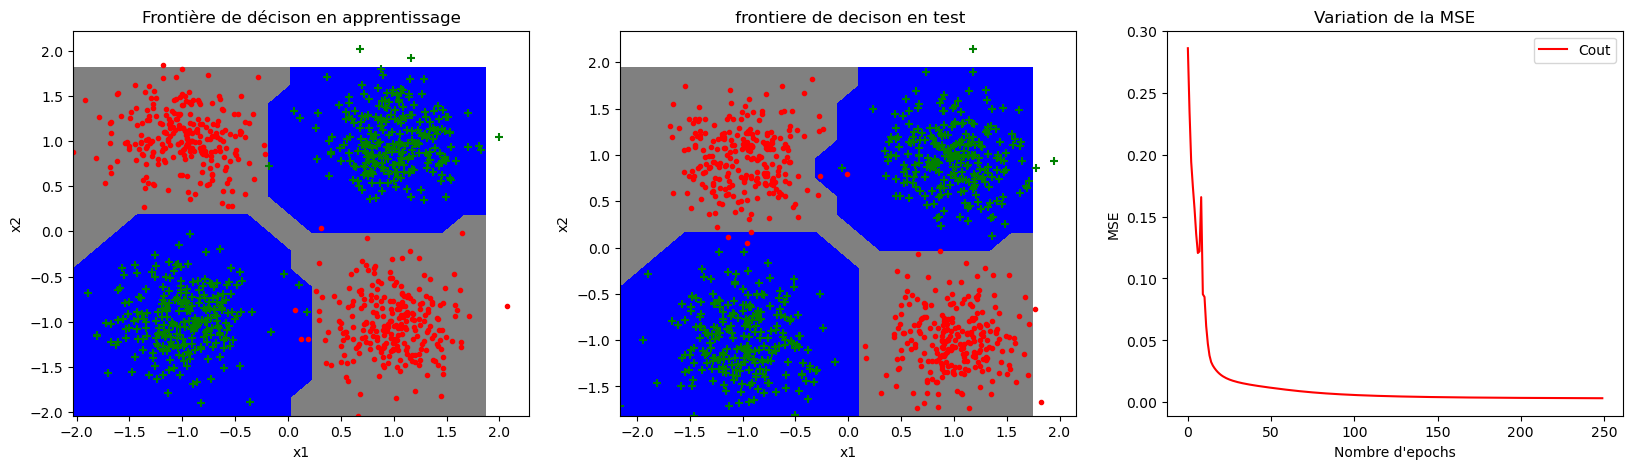

In [34]:
print("accuracy train: ", opt.score(datay, pred_train))
print("accuracy test: ", opt.score(testy, pred_test))

fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(20,5))
ax.flatten()

tools.plot_frontiere(datax,opt._net.predict,ax=ax[0])
tools.plot_data(datax, datay,ax[0])
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[0].set_title("Frontière de décison en apprentissage")

tools.plot_frontiere(testx, opt._net.predict, ax=ax[1])
tools.plot_data(testx, testy, ax[1])
ax[1].set_xlabel("x1")
ax[1].set_ylabel("x2")
ax[1].set_title(" frontiere de decison en test")


ax[2].plot(np.arange(len(couts)), couts, color='red')
ax[2].legend(["Cout"])
ax[2].set_xlabel("Nombre d'epochs")
ax[2].set_ylabel("MSE")
ax[2].set_title("Variation de la MSE")
plt.show()